In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
weather = pd.read_csv("Weather-Data.csv")
weather

,Date,Temperature,Humidity,Wind Speed,Rain,Cities
0,1/1/2024,22,60,15,0.0,New York
1,1/2/2024,24,55,12,0.0,Los Angeles
2,1/3/2024,23,58,10,0.0,Chicago
3,1/4/2024,20,65,18,0.0,Houston
4,1/5/2024,21,63,16,1.2,Phoenix
...,...,...,...,...,...,...
86,3/27/2024,22,60,16,0.3,Augusta
87,3/28/2024,23,61,13,0.0,Grand Rapids
88,3/29/2024,21,65,14,0.0,Mobile
89,3/30/2024,22,62,15,0.0,Salt Lake City


In [2]:
#make a copy of df (Good practice)
copy_weather = weather.copy()
copy_weather

,Date,Temperature,Humidity,Wind Speed,Rain,Cities
0,1/1/2024,22,60,15,0.0,New York
1,1/2/2024,24,55,12,0.0,Los Angeles
2,1/3/2024,23,58,10,0.0,Chicago
3,1/4/2024,20,65,18,0.0,Houston
4,1/5/2024,21,63,16,1.2,Phoenix
...,...,...,...,...,...,...
86,3/27/2024,22,60,16,0.3,Augusta
87,3/28/2024,23,61,13,0.0,Grand Rapids
88,3/29/2024,21,65,14,0.0,Mobile
89,3/30/2024,22,62,15,0.0,Salt Lake City


In [3]:
#check datatypes and conversion 
print(copy_weather.dtypes)
#checking datetime and making sure it's datetime rather than object/string if no then convert it to datetime:
copy_weather['Date'] = pd.to_datetime(copy_weather['Date'])
copy_weather['Date'].dtype

Date             object
Temperature       int64
Humidity          int64
Wind Speed        int64
Rain            float64
Cities           object
dtype: object


dtype('<M8[ns]')

In [4]:
#basic info of dataset 
print("First 5 rows: ",copy_weather.head(5))
print("\nlast five rows: \n",copy_weather.tail(5))
print("\nStats: \n",copy_weather.describe())

First 5 rows:          Date  Temperature   Humidity  Wind Speed  Rain       Cities
0 2024-01-01            22        60          15   0.0     New York
1 2024-01-02            24        55          12   0.0  Los Angeles
2 2024-01-03            23        58          10   0.0      Chicago
3 2024-01-04            20        65          18   0.0      Houston
4 2024-01-05            21        63          16   1.2      Phoenix

last five rows: 
          Date  Temperature   Humidity  Wind Speed  Rain          Cities
86 2024-03-27            22        60          16   0.3         Augusta
87 2024-03-28            23        61          13   0.0    Grand Rapids
88 2024-03-29            21        65          14   0.0          Mobile
89 2024-03-30            22        62          15   0.0  Salt Lake City
90 2024-03-31            23        60          16   0.0     Tallahassee

Stats: 
                       Date  Temperature    Humidity  Wind Speed       Rain
count                   91     91.000000 

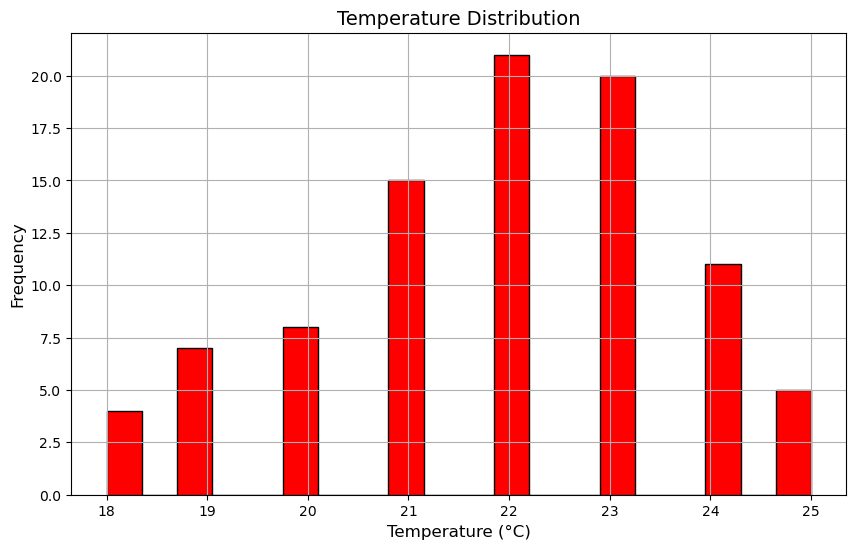

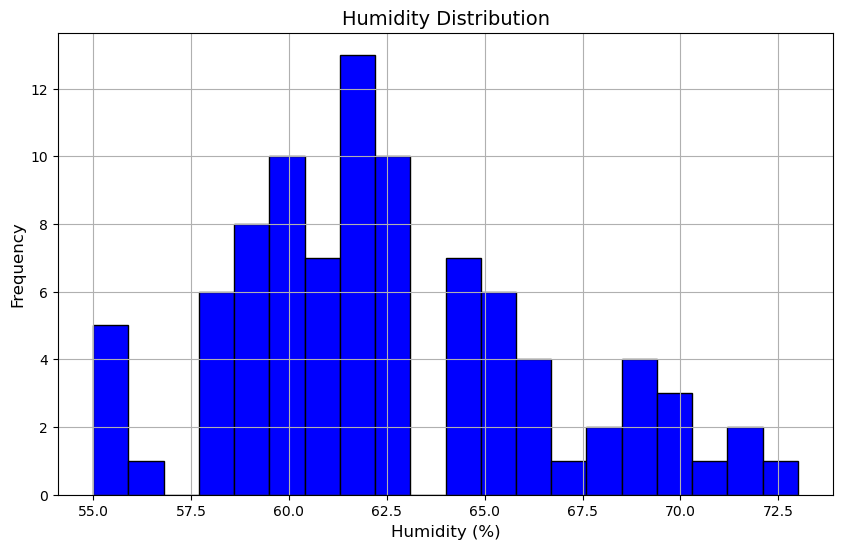

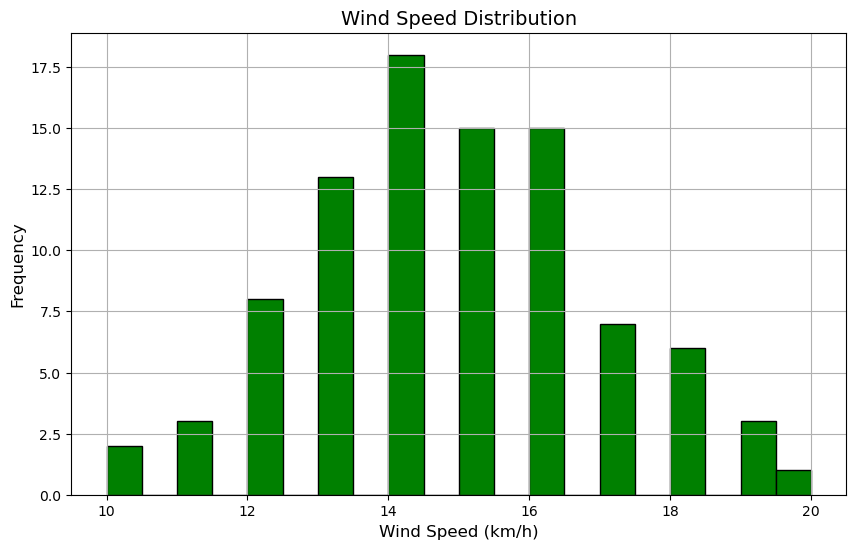

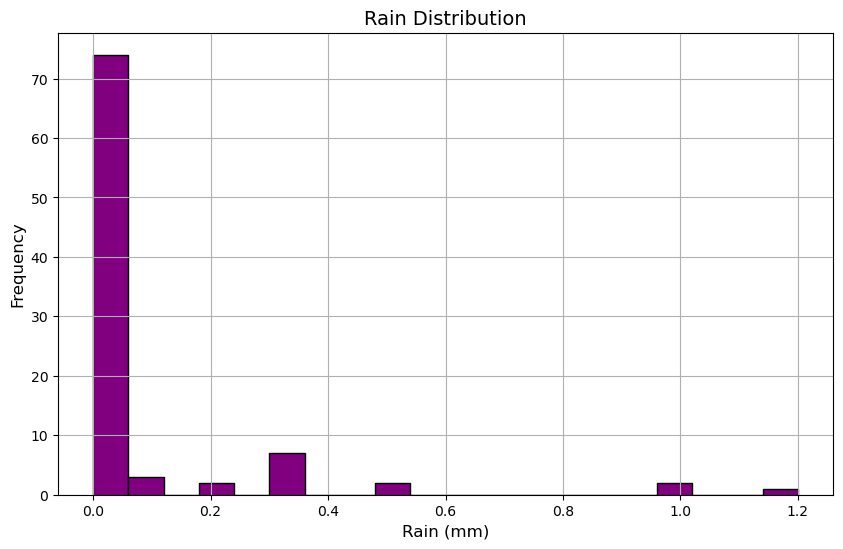

In [7]:
import matplotlib.pyplot as plt

# Plot for Temperature
plt.figure(figsize=(10, 6))
copy_weather['Temperature '].hist(bins=20, color='red', edgecolor='black')
plt.title('Temperature Distribution', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Plot for Humidity
plt.figure(figsize=(10, 6))
copy_weather['Humidity'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Humidity Distribution', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Plot for Wind Speed
plt.figure(figsize=(10, 6))
copy_weather['Wind Speed'].hist(bins=20, color='green', edgecolor='black')
plt.title('Wind Speed Distribution', fontsize=14)
plt.xlabel('Wind Speed (km/h)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Plot for Rain
plt.figure(figsize=(10, 6))
copy_weather['Rain'].hist(bins=20, color='purple', edgecolor='black')
plt.title('Rain Distribution', fontsize=14)
plt.xlabel('Rain (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


In [15]:
#check temperatures
max_temperature = copy_weather['Temperature '].max()
print("Maximum temperature recorded is: ",max_temperature)
Hottest_days = copy_weather[copy_weather['Temperature ']>24]
print("Hottest Temperature record is: \n",Hottest_days)
hot_and_humid = copy_weather[(copy_weather['Temperature '] > 30) & (copy_weather['Humidity'] > 70)]
print(hot_and_humid)

Maximum temperature recorded is:  25
Hottest Temperature record is: 
          Date  Temperature   Humidity  Wind Speed  Rain      Cities
10 2024-01-11            25        60          15   0.0      Austin
28 2024-01-29            25        55          12   0.0  Louisville
53 2024-02-23            25        55          13   0.0    Honolulu
64 2024-03-05            25        55          12   0.0  Pittsburgh
76 2024-03-17            25        55          13   0.0     Madison
Empty DataFrame
Columns: [Date, Temperature , Humidity, Wind Speed, Rain, Cities]
Index: []


In [17]:
#grouping data
stats = copy_weather.groupby('Humidity').agg({
    'Temperature ': ['mean', 'max'],
    'Wind Speed': ['mean', 'min']
})
print(stats)

         Temperature      Wind Speed    
                 mean max       mean min
Humidity                                
55          24.800000  25  12.400000  12
56          24.000000  24  11.000000  11
58          23.833333  24  14.500000  10
59          23.500000  24  14.500000  13
60          22.700000  25  15.000000  11
61          22.428571  23  14.857143  13
62          22.307692  23  14.692308  12
63          21.600000  23  14.800000  12
64          21.714286  23  14.142857  13
65          20.666667  21  15.166667  12
66          20.250000  21  14.250000  14
67          20.000000  20  11.000000  11
68          20.000000  20  15.500000  14
69          18.750000  19  16.250000  12
70          19.000000  19  17.000000  14
71          19.000000  19  15.000000  15
72          18.000000  18  16.500000  14
73          18.000000  18  17.000000  17


In [29]:
by_Day = copy_weather.resample('D', on='Date').mean(numeric_only=True)
by_Week = copy_weather.resample('W', on='Date').mean(numeric_only=True)
by_month = copy_weather.resample('ME', on='Date').mean(numeric_only=True)

print(f'Data by day:\n{by_Day}\nData by week:\n{by_Week}\nData by month:\n{by_month}')


Data by day:
            Temperature   Humidity  Wind Speed  Rain
Date                                                
2024-01-01          22.0      60.0        15.0   0.0
2024-01-02          24.0      55.0        12.0   0.0
2024-01-03          23.0      58.0        10.0   0.0
2024-01-04          20.0      65.0        18.0   0.0
2024-01-05          21.0      63.0        16.0   1.2
...                  ...       ...         ...   ...
2024-03-27          22.0      60.0        16.0   0.3
2024-03-28          23.0      61.0        13.0   0.0
2024-03-29          21.0      65.0        14.0   0.0
2024-03-30          22.0      62.0        15.0   0.0
2024-03-31          23.0      60.0        16.0   0.0

[91 rows x 4 columns]
Data by week:
            Temperature    Humidity  Wind Speed      Rain
Date                                                     
2024-01-07     21.571429  61.857143   14.571429  0.171429
2024-01-14     22.142857  63.142857   13.571429  0.114286
2024-01-21     21.285714  64.

In [35]:
copy_weather['wind_chill'] = copy_weather['Temperature '].apply(lambda x: x - 0.5 if x > 20 else x)
print(copy_weather.head())

        Date  Temperature   Humidity  Wind Speed  Rain       Cities  \
0 2024-01-01            22        60          15   0.0     New York   
1 2024-01-02            24        55          12   0.0  Los Angeles   
2 2024-01-03            23        58          10   0.0      Chicago   
3 2024-01-04            20        65          18   0.0      Houston   
4 2024-01-05            21        63          16   1.2      Phoenix   

   wind_chill  
0        21.5  
1        23.5  
2        22.5  
3        20.0  
4        20.5  


Plot 1:


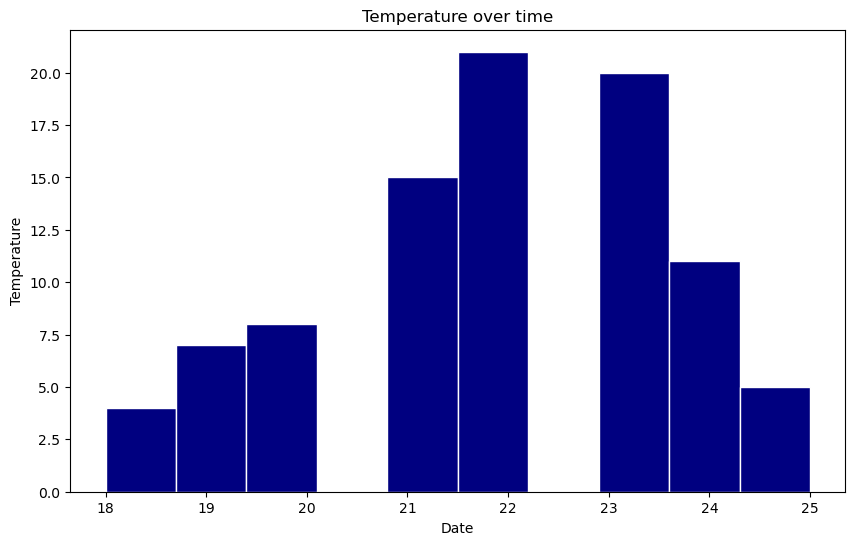


Plot 2:


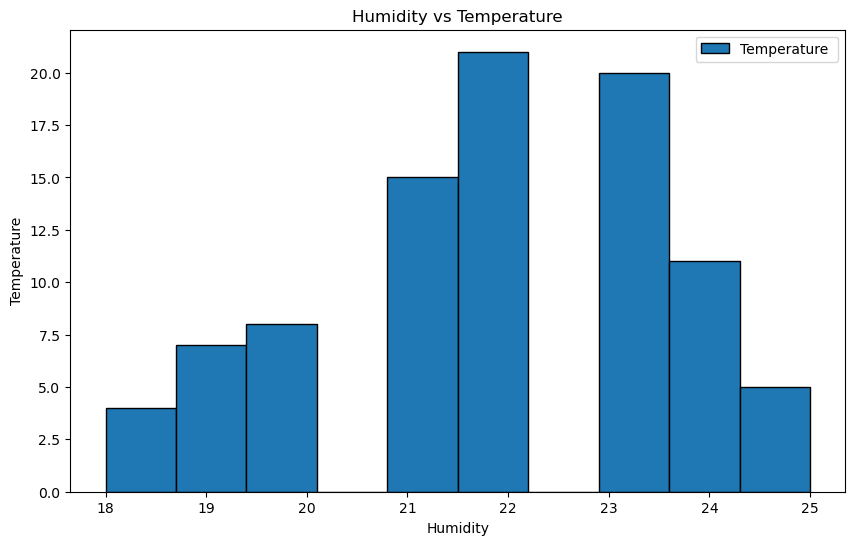

In [66]:
#plottings: 
print("Plot 1:")
Temperature_overTime = copy_weather.groupby('Date')['Temperature '].mean()
Temperature_overTime.plot(kind='hist',
                          figsize=(10,6),
                          xlabel='Date',
                          ylabel='Temperature',
                          title="Temperature over time",
                          color='navy',edgecolor='white')
plt.show()
print("\nPlot 2:")
copy_weather.plot.hist(
    x='Humidity',
    y='Temperature ',
    figsize=(10, 6),
    xlabel='Humidity',
    ylabel='Temperature',
    title='Humidity vs Temperature',
    edgecolor='Black'
)

plt.show()

In [71]:
by_cities = copy_weather.groupby('Cities')
for city, data in by_cities:
    print(f"Weather data for {city}:")
    print(data)
    print("\n" + "-"*50 + "\n")

Weather data for Albuquerque:
         Date  Temperature   Humidity  Wind Speed  Rain       Cities  \
31 2024-02-01            21        63          16   0.0  Albuquerque   

    wind_chill  
31        20.5  

--------------------------------------------------

Weather data for Anaheim:
         Date  Temperature   Humidity  Wind Speed  Rain   Cities  wind_chill
54 2024-02-24            23        60          18   0.0  Anaheim        22.5

--------------------------------------------------

Weather data for Anchorage:
         Date  Temperature   Humidity  Wind Speed  Rain     Cities  wind_chill
67 2024-03-08            21        64          15   0.0  Anchorage        20.5

--------------------------------------------------

Weather data for Arlington:
         Date  Temperature   Humidity  Wind Speed  Rain     Cities  wind_chill
46 2024-02-16            20        65          15   0.0  Arlington        20.0

--------------------------------------------------

Weather data for Atlanta:
 